<a href="https://colab.research.google.com/github/aniilkeles/LifeExpectancyPrediction/blob/main/LifeExpectancyPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

Life expectancy is one of the most important indicators reflecting a country’s overall health conditions, economic development level, and quality of life. It is influenced by a wide range of factors such as healthcare access, vaccination rates, education level, income, nutrition, and disease prevalence. Understanding how these factors interact and affect life expectancy is essential for policymakers, health organizations, and researchers in order to design effective social and health strategies.

In this project, a regression-based machine learning approach is applied to analyze and predict life expectancy using the WHO Life Expectancy dataset. The dataset includes multiple socio-economic and health-related variables such as adult mortality, infant deaths, alcohol consumption, immunization coverage, GDP, schooling years, and healthcare expenditure. Since these variables come from different domains and scales, the dataset provides a comprehensive environment for data analysis and predictive modeling.

The main objective of this study is not only to build a model that predicts life expectancy but also to deeply explore the relationships between health, economic, and demographic indicators. Therefore, the project involves Exploratory Data Analysis (EDA) to understand data distributions, detect outliers, and analyze correlations. In addition, feature engineering techniques are applied to create meaningful new variables that better represent real-world conditions.

Another important aspect of this study is handling skewed data distributions. Many socio-economic variables such as GDP and population tend to be highly skewed. To address this issue, transformation techniques like Box-Cox and Yeo-Johnson are used to make the data more normally distributed, which can improve the performance and stability of regression models.

Finally, different regression models are trained and compared to evaluate predictive performance. The results of this project aim to demonstrate how data-driven approaches can help us better understand the determinants of life expectancy and the complex relationship between health and socio-economic development.

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Variable Descriptions

**Country**  
Represents the name of the country where the data was collected.

**Year**  
Indicates the year in which the data for that country was recorded.

**Status**  
Shows whether the country is classified as *Developed* or *Developing*, reflecting its overall economic and social development level.

**Life expectancy (Target Variable)**  
The average number of years a newborn is expected to live under current mortality conditions. This is the dependent variable to be predicted in the regression model.

**Adult Mortality**  
The probability of dying between ages 15 and 60 per 1000 population. It reflects general adult health risks.

**infant deaths**  
Number of infant deaths per 1000 live births. Indicates healthcare quality and living conditions.

**Alcohol**  
Per capita alcohol consumption (in liters of pure alcohol). Used as an indicator of lifestyle and health-related behavior.

**percentage expenditure**  
Expenditure on health as a percentage of Gross Domestic Product (GDP). Reflects how much a country invests in healthcare.

**Hepatitis B**  
Immunization coverage among 1-year-olds for Hepatitis B (percentage). Indicates vaccination effectiveness.

**Measles**  
Number of reported measles cases. High values may indicate weak immunization systems.

**BMI**  
Average Body Mass Index of the population. Reflects nutritional status and lifestyle.

**under-five deaths**  
Number of deaths of children under five years old. Strongly related to healthcare quality and living standards.

**Polio**  
Immunization coverage among 1-year-olds for Polio (percentage).

**Total expenditure**  
General government expenditure on health as a percentage of total government spending.

**Diphtheria**  
Immunization coverage for Diphtheria among children (percentage).

**HIV/AIDS**  
Number of deaths due to HIV/AIDS. Indicates the disease burden in a country.

**GDP**  
Gross Domestic Product per capita. Represents the economic strength of a country.

**Population**  
Total population of the country.

**thinness 1-19 years**  
Prevalence of thinness among children and adolescents aged 1–19 years. Indicates malnutrition levels.

**thinness 5-9 years**  
Prevalence of thinness among children aged 5–9 years.

**Income composition of resources**  
An index measuring income distribution and economic development (scaled between 0 and 1).

**Schooling**  
Average number of years of schooling. Reflects education level and human development.


In [20]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Life Expectancy Data.csv')

In [21]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [23]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [24]:
df.isnull().sum()

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


In [25]:
df.duplicated().sum()

np.int64(0)

In [26]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [27]:
df.corr(numeric_only=True)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


In [28]:
df.corr(numeric_only=True)['life_expectancy'].sort_values(ascending=False)

KeyError: 'life_expectancy'

In [29]:
df.groupby('status')['life_expectancy'].mean()

KeyError: 'status'

In [30]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [31]:
# Data Cleaning before EDA

In [32]:
new_columns = []

for col in df.columns:
  col = col.strip()
  col = col.replace(" ","_")
  col = col.replace("-","_")
  col = col.replace("/","_")
  col = col.lower()

  new_columns.append(col)

df.columns = new_columns

In [33]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness__1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [34]:
df.rename(columns={'thinness__1_19_years': 'thinness_1_19_years'}, inplace=True)

In [35]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_deaths', 'polio', 'total_expenditure',
       'diphtheria', 'hiv_aids', 'gdp', 'population', 'thinness_1_19_years',
       'thinness_5_9_years', 'income_composition_of_resources', 'schooling'],
      dtype='object')

In [36]:
#EDA

In [37]:
import math
def plot_all_histograms(df,title_prefix = ""):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(numeric_cols)/n_cols)

    plt.figure(figsize=(5*n_cols,4*n_rows))

    for i, col in enumerate(numeric_cols,1):
      plt.subplot(n_rows,n_cols,i)
      sns.histplot(df[col],kde=True,bins=30)
      plt.title(f"{title_prefix} {col}")
      plt.xlabel("")
      plt.ylabel("")

    plt.tight_layout()
    plt.show()

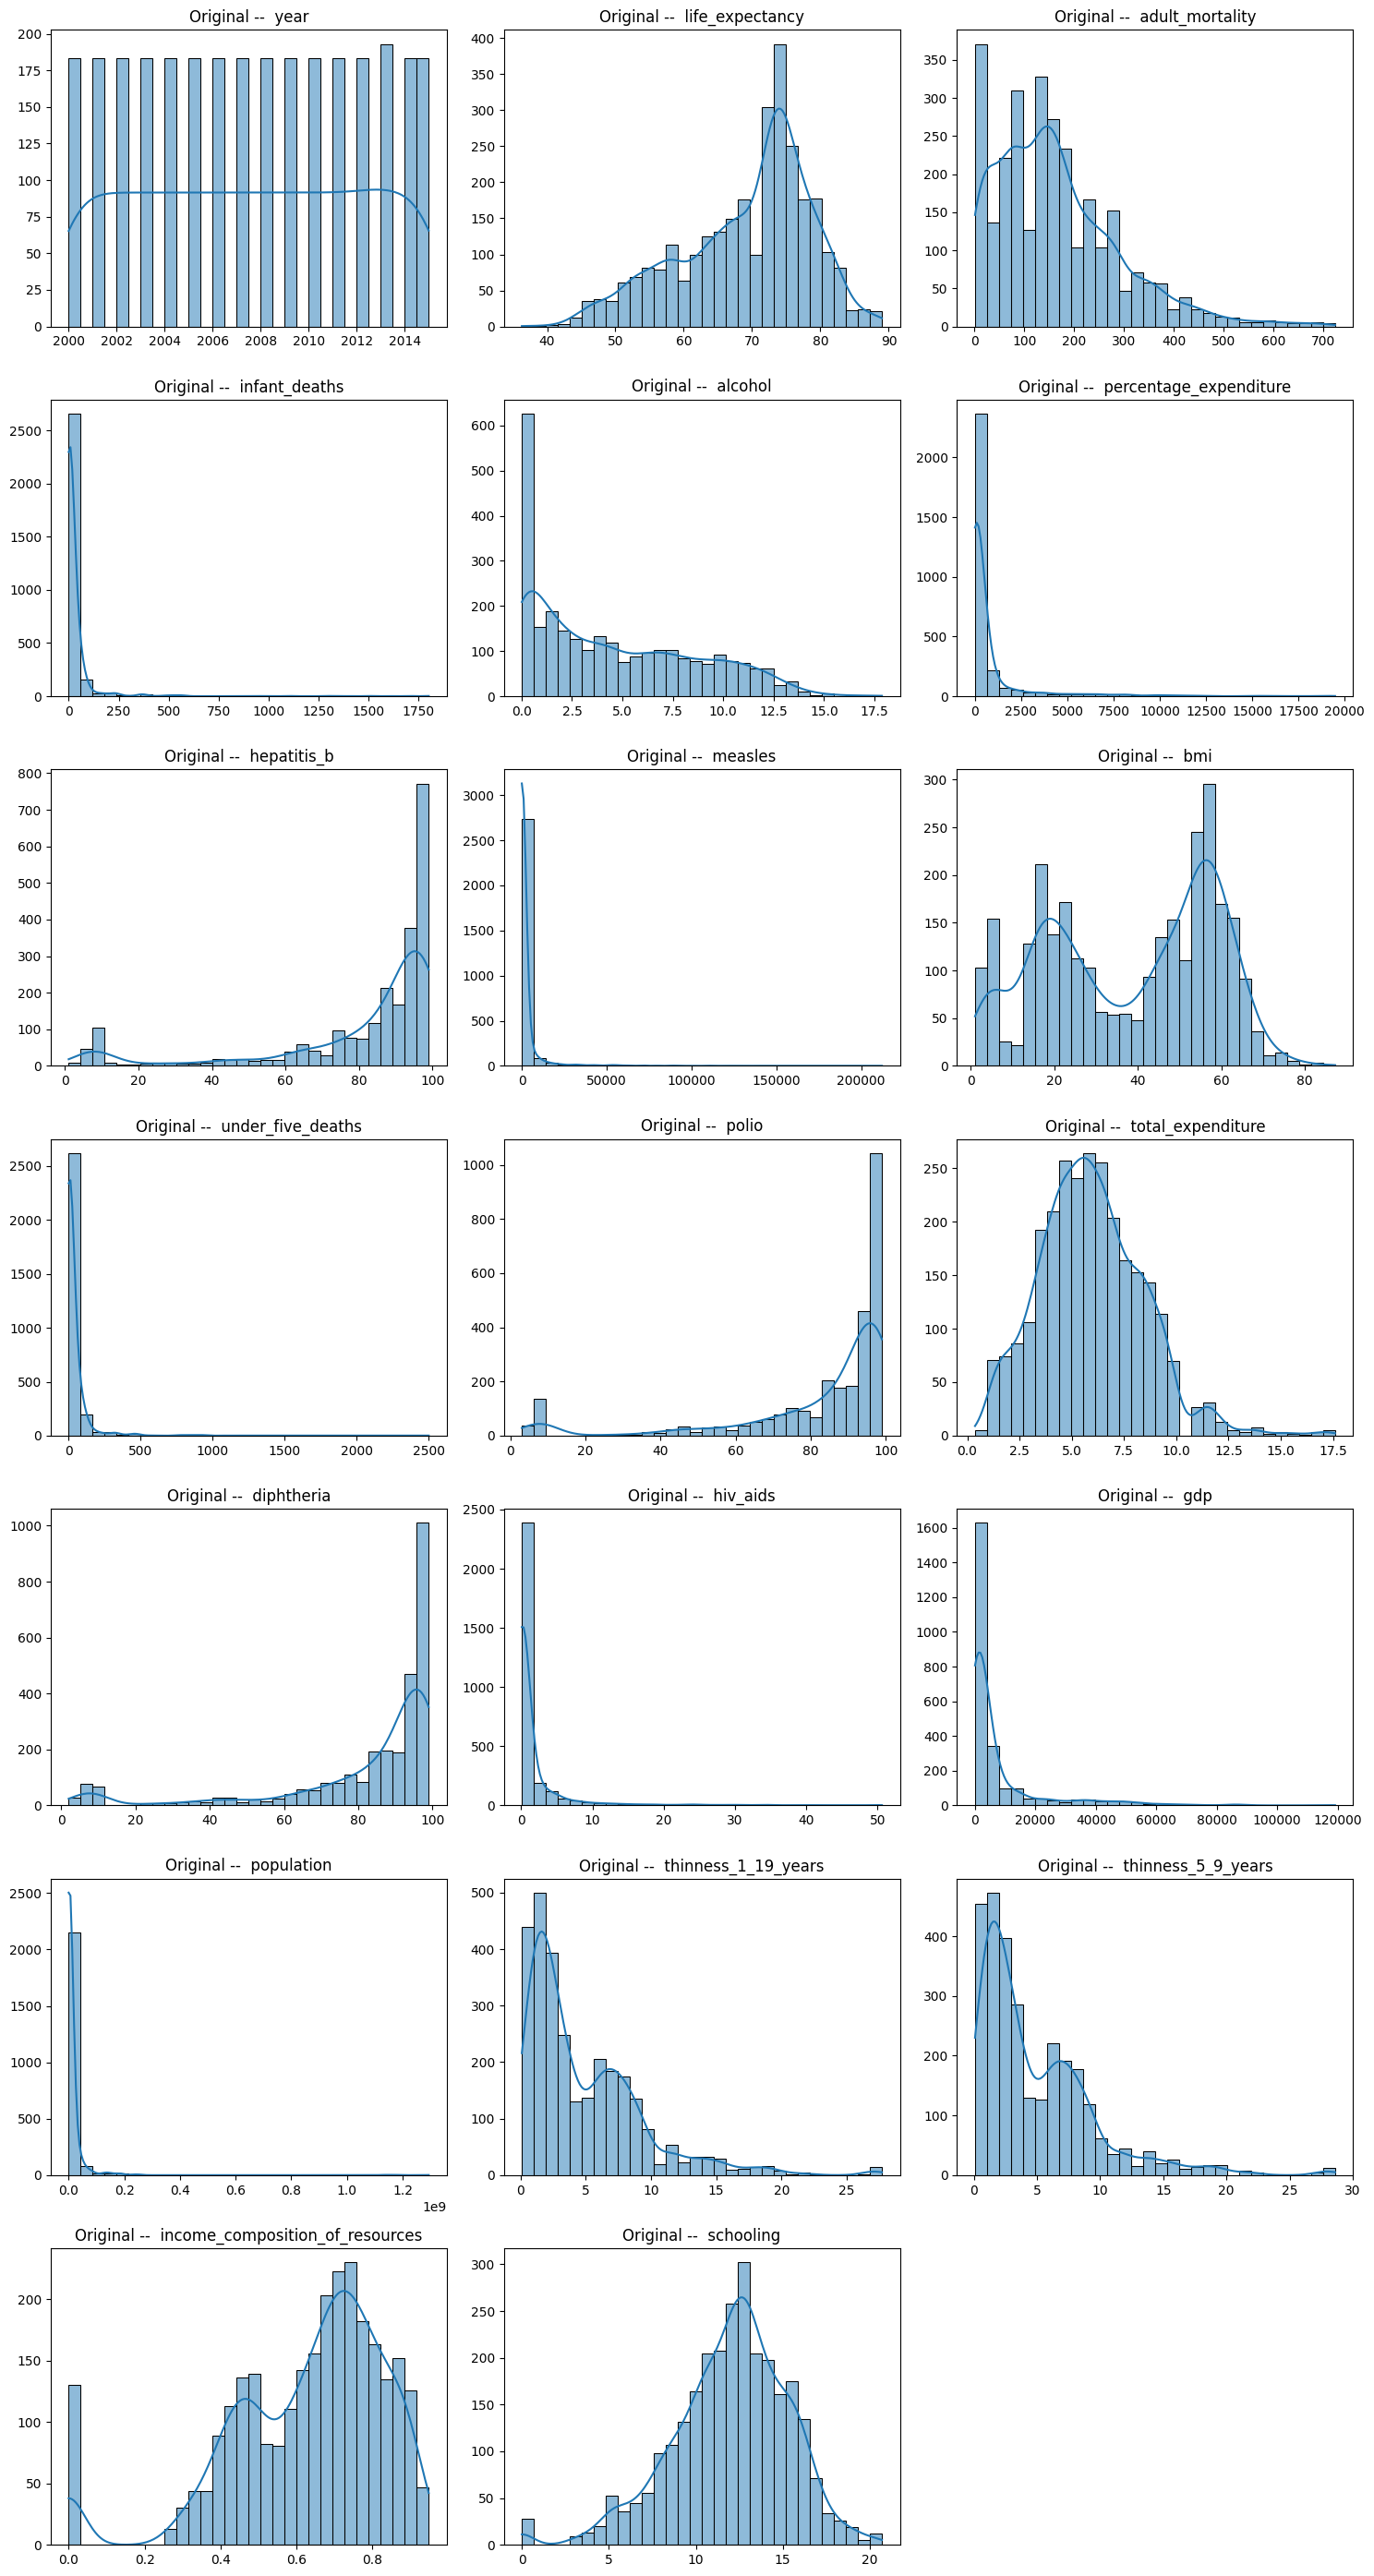

In [38]:
plot_all_histograms(df,title_prefix="Original -- ")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'year'),
  Text(1, 0, 'life_expectancy'),
  Text(2, 0, 'adult_mortality'),
  Text(3, 0, 'infant_deaths'),
  Text(4, 0, 'alcohol'),
  Text(5, 0, 'percentage_expenditure'),
  Text(6, 0, 'hepatitis_b'),
  Text(7, 0, 'measles'),
  Text(8, 0, 'bmi'),
  Text(9, 0, 'under_five_deaths'),
  Text(10, 0, 'polio'),
  Text(11, 0, 'total_expenditure'),
  Text(12, 0, 'diphtheria'),
  Text(13, 0, 'hiv_aids'),
  Text(14, 0, 'gdp'),
  Text(15, 0, 'population'),
  Text(16, 0, 'thinness_1_19_years'),
  Text(17, 0, 'thinness_5_9_years'),
  Text(18, 0, 'income_composition_of_resources'),
  Text(19, 0, 'schooling')])

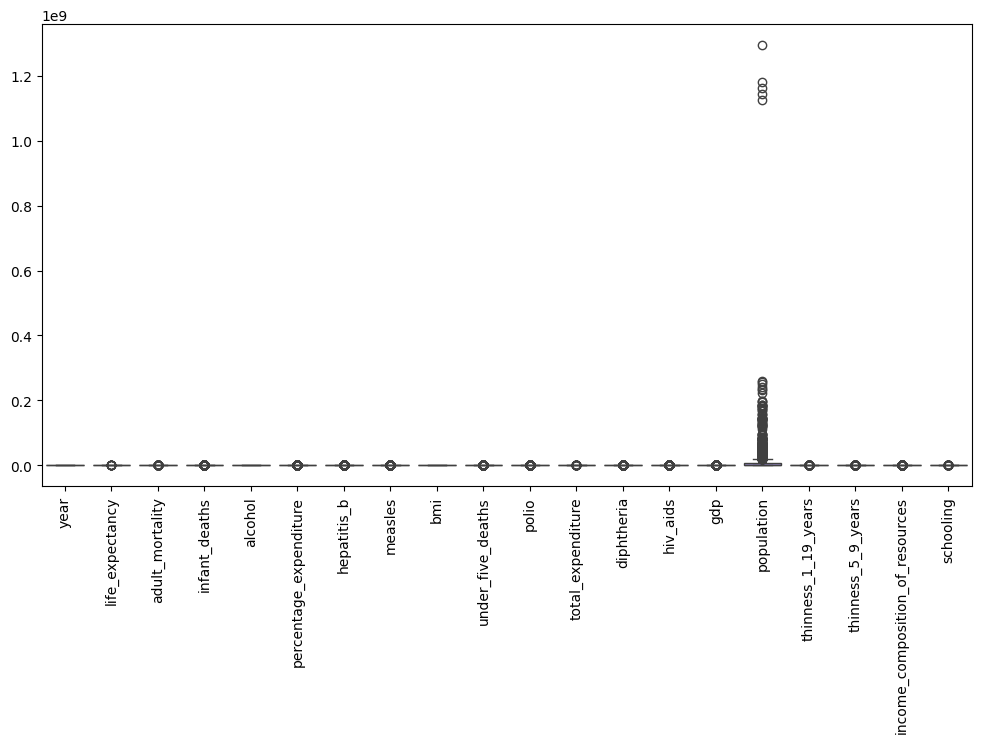

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)

<Axes: >

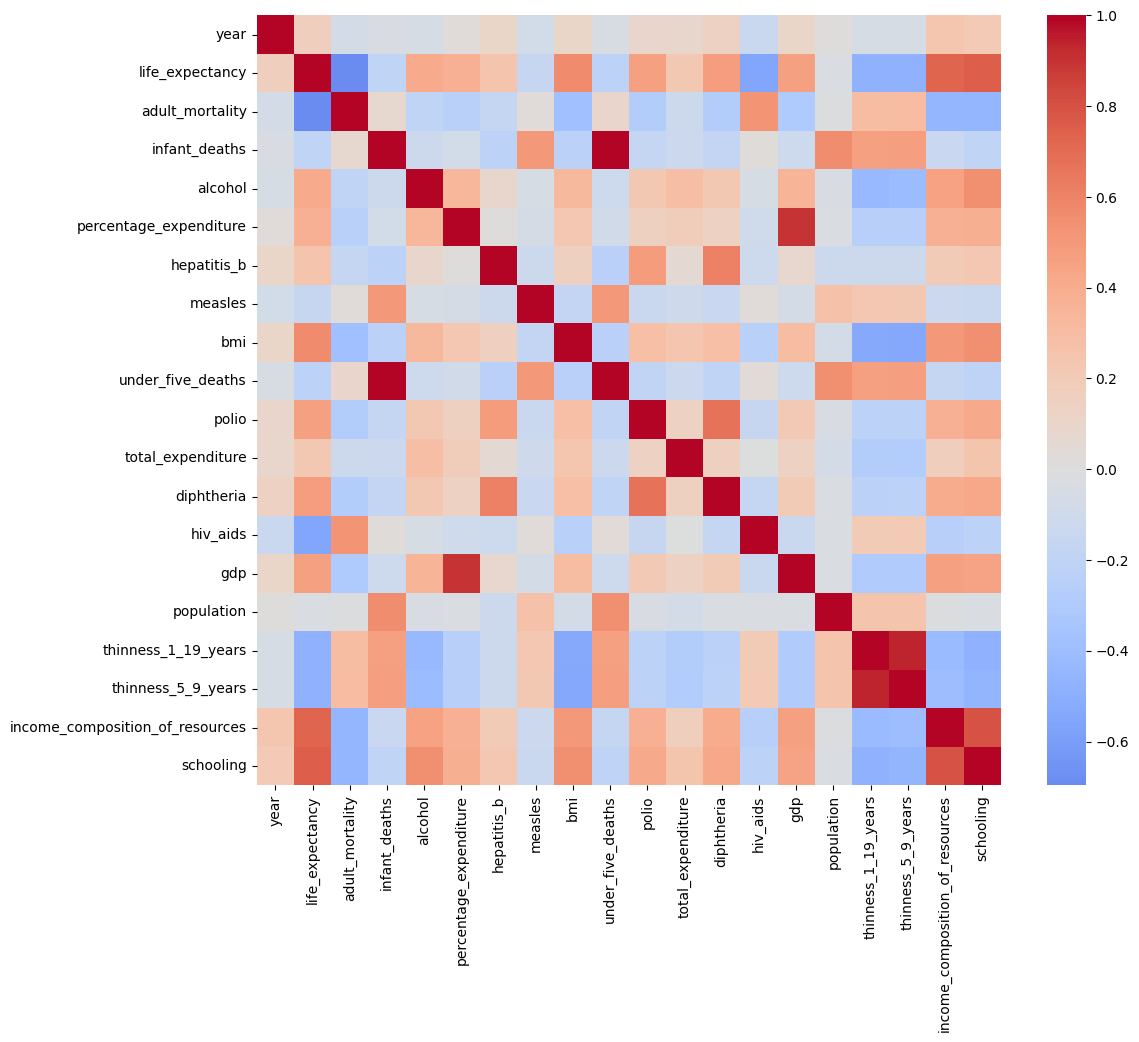

In [40]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', center=0)

<Axes: xlabel='status', ylabel='life_expectancy'>

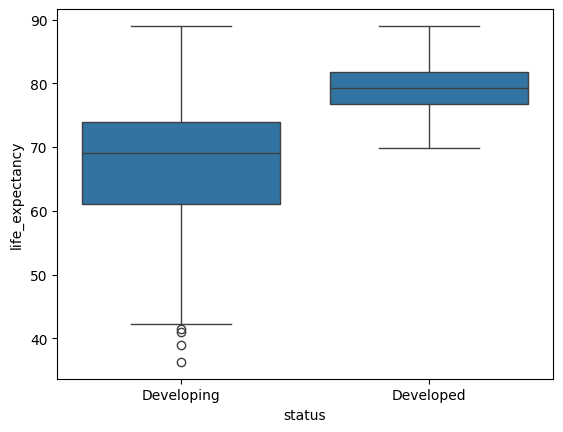

In [41]:
sns.boxplot(x='status', y='life_expectancy', data=df)

<Axes: xlabel='year'>

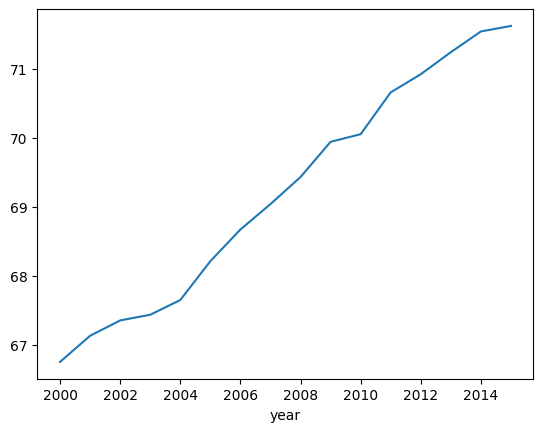

In [42]:
df.groupby('year')['life_expectancy'].mean().plot()

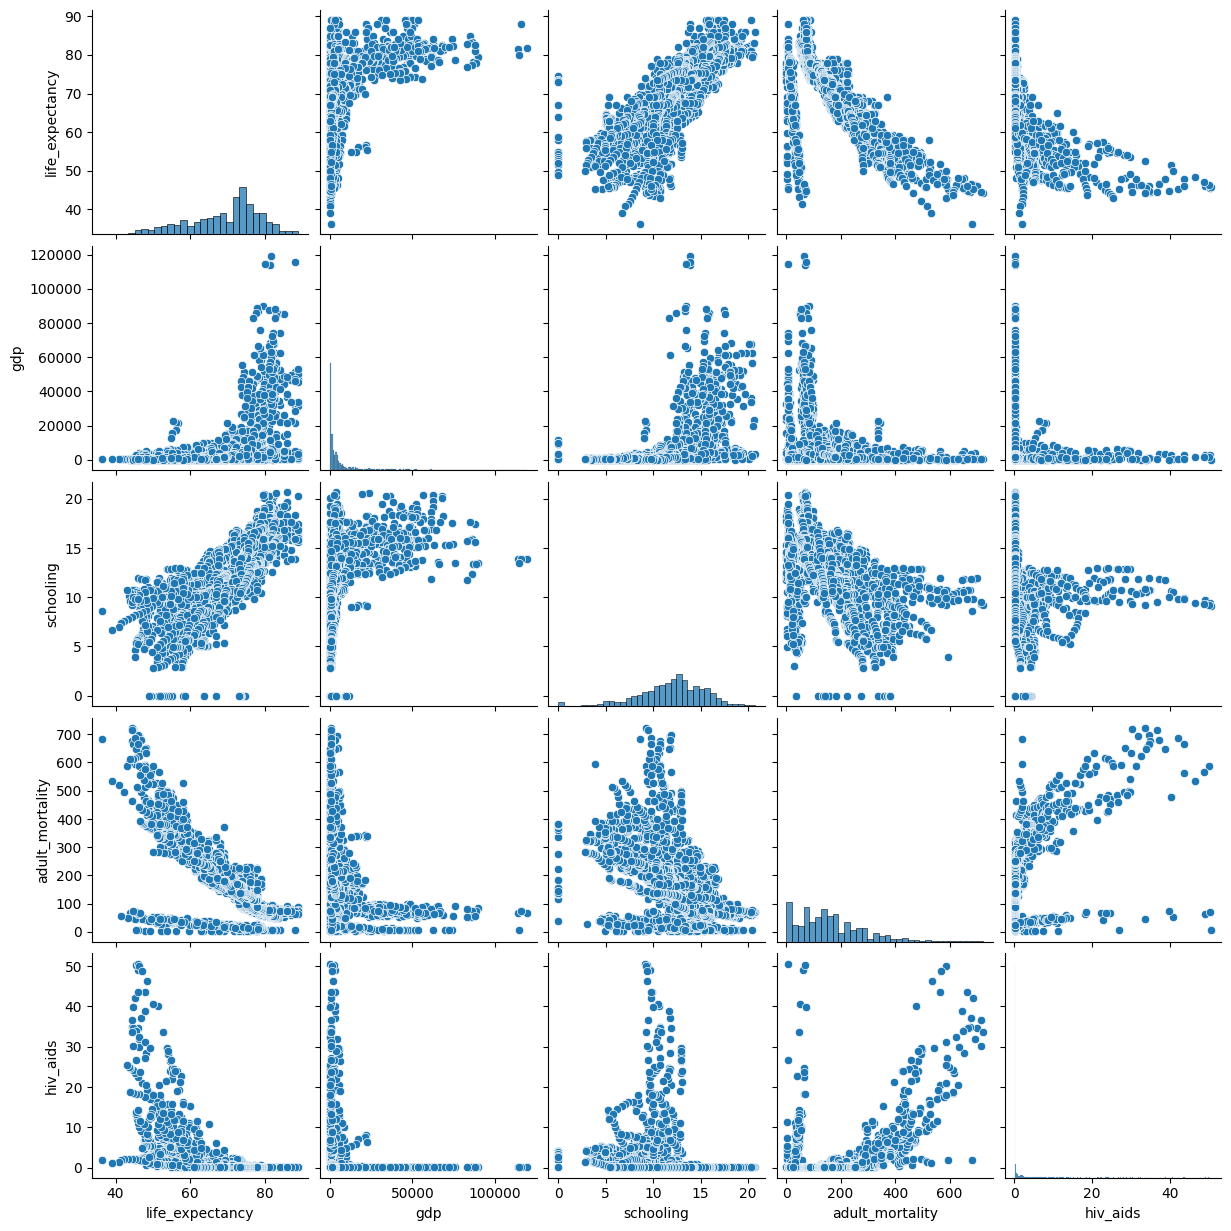

In [43]:
important_cols = ['life_expectancy','gdp','schooling','adult_mortality','hiv_aids']
sns.pairplot(df[important_cols])

In [44]:
skew_values = df.select_dtypes(include=np.number).skew().sort_values(ascending=False)
skew_values

,0
population,15.916236
infant_deaths,9.786963
under_five_deaths,9.495065
measles,9.441332
hiv_aids,5.396112
percentage_expenditure,4.652051
gdp,3.206655
thinness_5_9_years,1.777424
thinness_1_19_years,1.711471
adult_mortality,1.174369


In [45]:
# Missing Value Imputation

In [46]:
for col, missing in df.isnull().sum().items():
    print(f"Column Name: {col}  Missing Value Count: {missing}")

Column Name: country  Missing Value Count: 0
Column Name: year  Missing Value Count: 0
Column Name: status  Missing Value Count: 0
Column Name: life_expectancy  Missing Value Count: 10
Column Name: adult_mortality  Missing Value Count: 10
Column Name: infant_deaths  Missing Value Count: 0
Column Name: alcohol  Missing Value Count: 194
Column Name: percentage_expenditure  Missing Value Count: 0
Column Name: hepatitis_b  Missing Value Count: 553
Column Name: measles  Missing Value Count: 0
Column Name: bmi  Missing Value Count: 34
Column Name: under_five_deaths  Missing Value Count: 0
Column Name: polio  Missing Value Count: 19
Column Name: total_expenditure  Missing Value Count: 226
Column Name: diphtheria  Missing Value Count: 19
Column Name: hiv_aids  Missing Value Count: 0
Column Name: gdp  Missing Value Count: 448
Column Name: population  Missing Value Count: 652
Column Name: thinness_1_19_years  Missing Value Count: 34
Column Name: thinness_5_9_years  Missing Value Count: 34
Column

In [47]:
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under_five_deaths,polio,total_expenditure,diphtheria,hiv_aids,gdp,population,thinness_1_19_years,thinness_5_9_years,income_composition_of_resources,schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [48]:
# Mean Imputation
mean_cols = ['life_expectancy','adult_mortality','hepatitis_b','bmi','polio','diphtheria','thinness_1_19_years','thinness_5_9_years','income_composition_of_resources','schooling']

In [49]:
for col in mean_cols:
  df[col].fillna(df[col].mean(),inplace=True)

/tmp/ipython-input-3151505600.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(),inplace=True)


In [50]:
# Median Imputation

In [51]:
median_cols = ['alcohol','total_expenditure','gdp','population']

In [52]:
for col in median_cols:
    df[col].fillna(df[col].median(), inplace=True)

/tmp/ipython-input-883671926.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [53]:
print("Remaining missing values:\n")
print(df.isnull().sum())

Remaining missing values:

country                            0
year                               0
status                             0
life_expectancy                    0
adult_mortality                    0
infant_deaths                      0
alcohol                            0
percentage_expenditure             0
hepatitis_b                        0
measles                            0
bmi                                0
under_five_deaths                  0
polio                              0
total_expenditure                  0
diphtheria                         0
hiv_aids                           0
gdp                                0
population                         0
thinness_1_19_years                0
thinness_5_9_years                 0
income_composition_of_resources    0
schooling                          0
dtype: int64


In [54]:
corr_matrix = df.corr(numeric_only=True)
features = corr_matrix.drop('life_expectancy', axis=0).drop('life_expectancy', axis=1)
high_corr_pairs = []

for col1 in features.columns:
    for col2 in features.columns:
        if col1 != col2:
            corr_value = features.loc[col1, col2]
            if abs(corr_value) > 0.85:
                pair = tuple(sorted([col1, col2]))
                if pair not in high_corr_pairs:
                    high_corr_pairs.append(pair)

print("Highly correlated feature pairs:\n")
for pair in high_corr_pairs:
    print(pair, "->", features.loc[pair[0], pair[1]])


Highly correlated feature pairs:

('infant_deaths', 'under_five_deaths') -> 0.996628882039801
('gdp', 'percentage_expenditure') -> 0.9018191027160023
('thinness_1_19_years', 'thinness_5_9_years') -> 0.9391019921914646


In [55]:
df.drop(columns=['infant_deaths','percentage_expenditure','thinness_5_9_years'], inplace=True)

In [56]:
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'alcohol', 'hepatitis_b', 'measles', 'bmi', 'under_five_deaths',
       'polio', 'total_expenditure', 'diphtheria', 'hiv_aids', 'gdp',
       'population', 'thinness_1_19_years', 'income_composition_of_resources',
       'schooling'],
      dtype='object')

In [57]:
corr_matrix = df.corr(numeric_only=True)
features = corr_matrix.drop('life_expectancy', axis=0).drop('life_expectancy', axis=1)
high_corr_pairs = []

for col1 in features.columns:
    for col2 in features.columns:
        if col1 != col2:
            corr_value = features.loc[col1, col2]
            if abs(corr_value) > 0.85:
                pair = tuple(sorted([col1, col2]))
                if pair not in high_corr_pairs:
                    high_corr_pairs.append(pair)

print("Highly correlated feature pairs:\n")
for pair in high_corr_pairs:
    print(pair, "->", features.loc[pair[0], pair[1]])


Highly correlated feature pairs:



In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy                  2938 non-null   float64
 4   adult_mortality                  2938 non-null   float64
 5   alcohol                          2938 non-null   float64
 6   hepatitis_b                      2938 non-null   float64
 7   measles                          2938 non-null   int64  
 8   bmi                              2938 non-null   float64
 9   under_five_deaths                2938 non-null   int64  
 10  polio                            2938 non-null   float64
 11  total_expenditure                2938 non-null   float64
 12  diphtheria          

In [59]:
# train-test-split

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = df.drop(['life_expectancy', 'country'], axis=1)
y = df["life_expectancy"]

In [62]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [63]:
X_train["status"] = X_train["status"].map({'Developed':1,'Developing':0})
X_test['status']  = X_test['status'].map({'Developed':1, 'Developing':0})

In [64]:
from sklearn.preprocessing import PowerTransformer

In [65]:
transform_cols = [
    'gdp','population','alcohol','measles',
    'under_five_deaths','hiv_aids','adult_mortality',
    'thinness_1_19_years'
]

In [66]:
pt = PowerTransformer(method='yeo-johnson')

In [67]:
X_train[transform_cols] = pt.fit_transform(X_train[transform_cols])
X_test[transform_cols]  = pt.transform(X_test[transform_cols])

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [69]:
from sklearn.metrics import r2_score,mean_squared_error

In [70]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [71]:
models = {
    "Linear Regression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNN Regressor" : KNeighborsRegressor(),
    "Decision Tree Regressor" : DecisionTreeRegressor(random_state=15),
    "RandomForest Regressor" : RandomForestRegressor(random_state=15),
    "GradientBoosting Regressor" : GradientBoostingRegressor(random_state=15),
    "XGBOOST Regressor" : XGBRegressor(random_state=15),
    "LIGHTGBM Regressor" : LGBMRegressor(random_state=15,verbosity=-1)
}

In [72]:
results = []

for name,model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_test_scaled)

  r2 = r2_score(y_test,y_pred)
  rmse = np.sqrt(mean_squared_error(y_test,y_pred))

  results.append([name,rmse,r2])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [73]:
results_df = pd.DataFrame(results,columns=["Model","RMSE","R2 Score"])
results_df.sort_values(by="R2 Score", ascending=False)

,Model,RMSE,R2 Score
8,LIGHTGBM Regressor,1.948896,0.959481
7,XGBOOST Regressor,1.989865,0.957760
5,RandomForest Regressor,2.002766,0.957210
6,GradientBoosting Regressor,2.336042,0.941784
4,Decision Tree Regressor,2.823384,0.914960
3,KNN Regressor,2.951686,0.907056
2,Ridge,4.033145,0.826472
0,Linear Regression,4.033174,0.826470
1,Lasso,4.375120,0.795798


Ensemble-based gradient boosting models clearly outperformed traditional linear models in this study. Among all evaluated approaches, LightGBM delivered the best results, achieving an R² score of 0.959 and an RMSE of 1.94. These findings indicate that life expectancy is influenced by complex, non-linear interactions between socio-economic, demographic, and health-related indicators. The superior performance of LightGBM suggests that advanced ensemble methods are highly effective in capturing these intricate patterns within the data.

In [74]:
#hyperparameter-tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
rf_params={
    "n_estimators" : [100,200,500,1000],
    "max_depth" : [5,8,10,15,None],
    "max_features" : ["sqrt","log2",None],
    "min_samples_split" : [2,8,12,15,20],
}

lgbm_params = {
    "num_leaves" : [31,50,70],
    "max_depth" : [-1,5,10],
    "learning_rate" : [0.01,0.05,0.1],
    "n_estimators" : [100,300,1000],
    "min_child_samples" : [10,20,30],
    "subsample" : [0.6,0.8,1.0],
    "colsample_bytree" : [0.6,0.8,1.0],
    "reg_alpha" : [0,0.5,1.0],
    "reg_lambda" : [0,0.5,1.0]
}

xgb_params = {
    "learning_rate" : [0.1,0.01],
    "max_depth" : [5,8,12,20,30],
    "n_estimators" : [100,200,300,500],
    "colsample_bytree" : [0.3,0.4,0.5,0.7,1]
}

In [77]:
rscv_models = [
            ("RF",RandomForestRegressor(random_state=15),rf_params),
            ("LGBM",LGBMRegressor(random_state=15),lgbm_params),
            ("XGB",XGBRegressor(random_state=15, verbosity=0),xgb_params)
]

In [82]:
for name,model,params in rscv_models:
  randomcv = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=25,cv=3,n_jobs=-1,random_state=15,scoring="r2")
  randomcv.fit(X_train_scaled,y_train)
  print("best params for : ",name, randomcv.best_params_)
  print("Best CV R2:", randomcv.best_score_)
  print("-" * 50)

best params for :  RF {'n_estimators': 200, 'min_samples_split': 2, 'max_features': None, 'max_depth': None}
Best CV R2: 0.9557802320485237
--------------------------------------------------
best params for :  LGBM {'subsample': 1.0, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'num_leaves': 31, 'n_estimators': 1000, 'min_child_samples': 10, 'max_depth': -1, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best CV R2: 0.9641726929672328
--------------------------------------------------
best params for :  XGB {'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.7}
Best CV R2: 0.9596069247384266
--------------------------------------------------


In [79]:
best_model = randomcv.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test R2:", r2_score(y_test, y_pred))

Test R2: 0.9630356013015812


In [83]:
df_before = df.copy()

# Yeo-Johnson uygulanan kolonlar
df_before[transform_cols] = pt.inverse_transform(df[transform_cols])
skew_before = df_before.select_dtypes(include=np.number).skew()
skew_after = df.select_dtypes(include=np.number).skew()

skew_comparison = pd.DataFrame({
    "Before Transform": skew_before,
    "After Transform": skew_after
})

skew_comparison["Improvement"] = skew_comparison["Before Transform"] - skew_comparison["After Transform"]

skew_comparison.sort_values(by="Before Transform", ascending=False)

/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1260: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:52: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1272: RuntimeWarning: overflow encountered in power
  result = (count * (count - 1) ** 0.5 / (count - 2)) * (m3 / m2**1.5)


,Before Transform,After Transform,Improvement
thinness_1_19_years,31.005357,1.721451,29.283907
hiv_aids,8.903186,5.396112,3.507074
adult_mortality,4.014458,1.176371,2.838087
measles,3.752890,9.441332,-5.688442
alcohol,2.647085,0.649578,1.997507
under_five_deaths,2.269795,9.495065,-7.225269
total_expenditure,0.661108,0.661108,0.000000
year,-0.006409,-0.006409,0.000000
bmi,-0.220590,-0.220590,0.000000
schooling,-0.619859,-0.619859,0.000000


Conclusion

In this project, a comprehensive regression analysis was conducted to model and predict life expectancy using socio-economic, demographic, and health-related indicators. The study followed a structured machine learning pipeline including data cleaning, exploratory data analysis, missing value imputation, feature selection, skewness reduction through power transformations, encoding, and feature scaling.

Correlation analysis was performed to eliminate multicollinearity, ensuring a stable and interpretable feature space. Power transformations such as Yeo-Johnson were applied to highly skewed numerical variables, significantly improving distribution symmetry and enhancing model learning capability.

Multiple regression algorithms were evaluated, including linear models and ensemble-based methods. While Linear Regression demonstrated strong baseline performance, ensemble models—particularly LightGBM, XGBoost, and Random Forest—substantially outperformed linear approaches. This indicates the presence of complex, non-linear relationships among the variables affecting life expectancy.

Hyperparameter tuning using RandomizedSearchCV further improved performance. The optimized LightGBM model achieved a cross-validation R² score of approximately 0.964 and a test R² score of 0.963, demonstrating excellent predictive accuracy and strong generalization without overfitting.

Feature importance analysis revealed that variables related to education, economic development, healthcare access, disease prevalence, and mortality rates were the most influential factors in determining life expectancy. These findings align with real-world knowledge, confirming the model’s validity and interpretability.

Overall, the study shows that advanced ensemble learning methods combined with proper preprocessing techniques can effectively model life expectancy and uncover meaningful insights from complex health and socio-economic data.